In [65]:
# Import packages
import os
import os.path
import scanpy as sc
from matplotlib import pyplot as plt

In [62]:
# Variables
in_file = "../data/HLCA/core.h5ad"
plot_dir = "../analysis/reference_hlca-core/"
os.mkdir(plot_dir)
out_file = "../data/HLCA/ref_hlca.h5ad"

In [7]:
# Read data
adata = sc.read(in_file)

/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


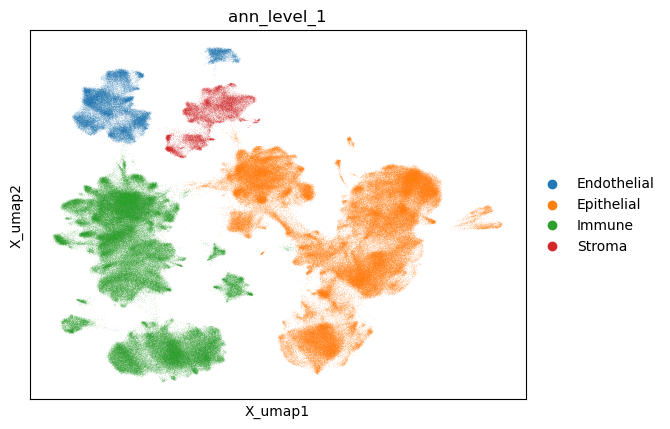

In [8]:
# Plot cell types
sc.pl.embedding(adata, basis="X_umap", color="ann_level_1")

/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


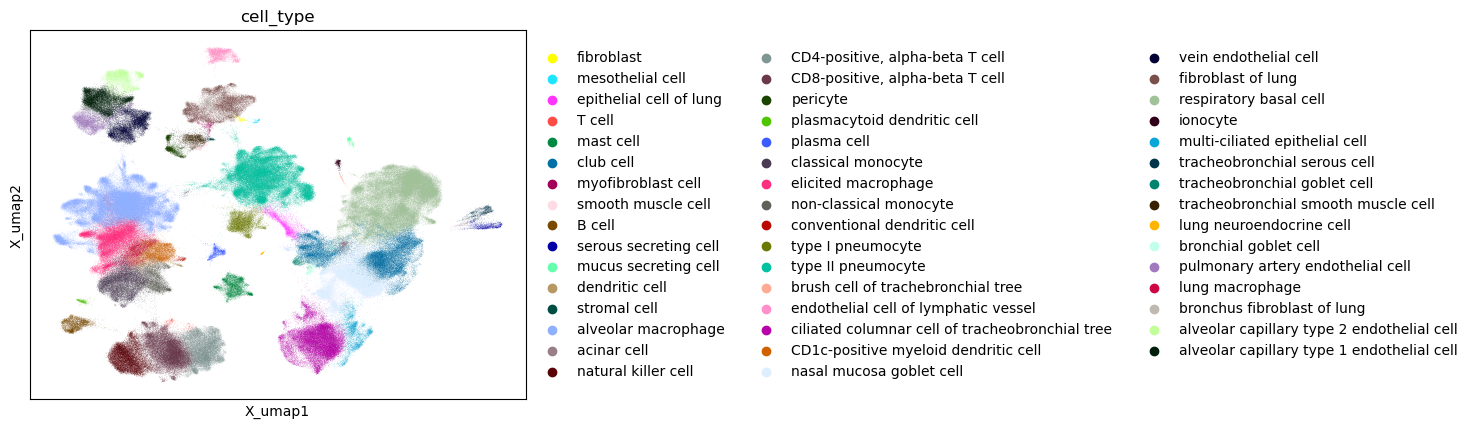

In [11]:
# Plot
sc.pl.embedding(adata, basis="X_umap", color="cell_type")

/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


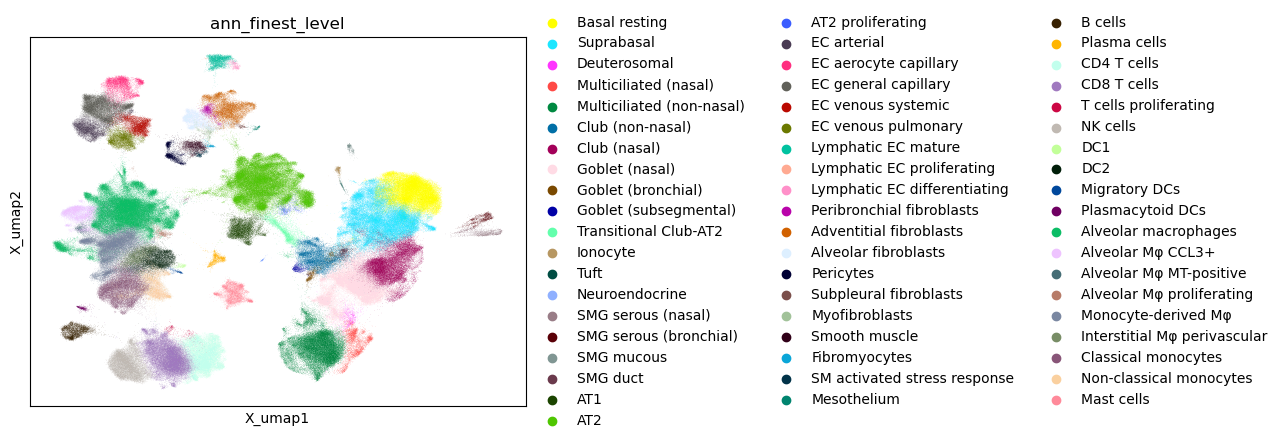

['Alveolar macrophages', 'NK cells', 'AT2', 'Alveolar Mφ CCL3+', 'Suprabasal', ..., 'Plasmacytoid DCs', 'T cells proliferating', 'Subpleural fibroblasts', 'Lymphatic EC proliferating', 'Migratory DCs']
Length: 58
Categories (58, object): ['Basal resting', 'Suprabasal', 'Deuterosomal', 'Multiciliated (nasal)', ..., 'Interstitial Mφ perivascular', 'Classical monocytes', 'Non-classical monocytes', 'Mast cells']

In [52]:
# Plot
sc.pl.embedding(adata, basis="X_umap", color="ann_finest_level")
adata.obs["ann_finest_level"].unique()

In [12]:
# Combine cell types to new annotation level
index = adata.obs["ann_level_1"].isin(["Immune"])
index = adata.obs[index].index
adata.obs["label"] = adata.obs["ann_level_1"].astype("str")
adata.obs["label"][index] = adata.obs["ann_level_4"][index].astype("str")

/vol/tmp/ipykernel_932778/3747635069.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["label"][index] = adata.obs["ann_level_4"][index].astype("str")


/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


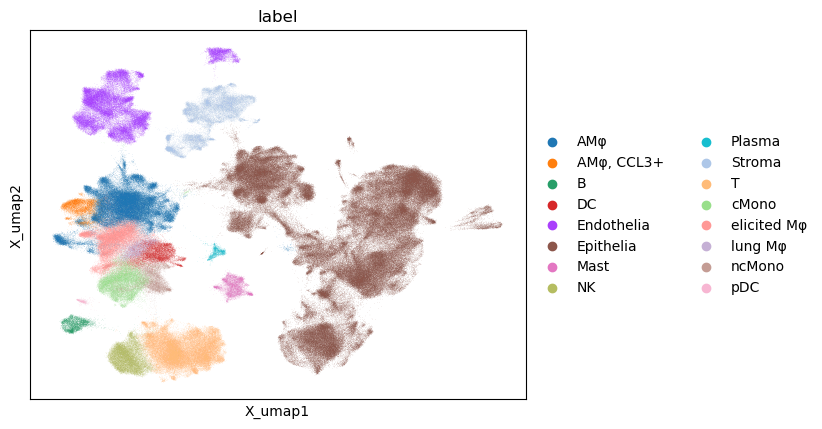

In [66]:
# Combine cell types to new annotation level
index = adata.obs["ann_level_1"].isin(["Immune"])
index = adata.obs[index].index
label = adata.obs["ann_level_1"].astype("str")
label[index] = adata.obs["cell_type"][index].astype("str")
label[label == "Epithelial"] = "Epithelia"
label[label == "Endothelial"] = "Endothelia"
label[label == "natural killer cell"] = "NK"
label[label == "CD4-positive, alpha-beta T cell"] = "T"
label[label == "CD8-positive, alpha-beta T cell"] = "T"
label[label == "T cell"] = "T"
label[label == "B cell"] = "B"
label[label == "CD1c-positive myeloid dendritic cell"] = "DC"
label[label == "conventional dendritic cell"] = "DC"
label[label == "dendritic cell"] = "DC"
label[label == "plasmacytoid dendritic cell"] = "pDC"
label[label == "plasma cell"] = "Plasma"
label[label == "classical monocyte"] = "cMono"
label[label == "non-classical monocyte"] = "ncMono"
label[label == "mast cell"] = "Mast"
label[label == "alveolar macrophage"] = "AMφ"
label[label == "elicited macrophage"] = "elicited Mφ"
label[label == "lung macrophage"] = "lung Mφ"
index = adata.obs["ann_finest_level"].isin(["Alveolar Mφ CCL3+"])
label[index] = "AMφ, CCL3+"
adata.obs["label"] = label.astype("category")

# Plot
sc.pl.embedding(adata, basis="X_umap", color="label")

In [ ]:
with plt.rc_context():  # Use this to set figure params like size and dpi
    sc.pl.embedding(adata, basis="X_umap", color="label", show=False)
    plt.savefig(plot_dir + 'umap_label.png', bbox_inches="tight")

/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/anndata/_core/anndata.py:1377: FutureWarning: In a future version of AnnData, access to `.X` by passing `layer='X'` will be removed. Instead pass `layer=None`.
  warnings.warn(
/home/odietric/miniconda3/envs/covid19-bal-atlas/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


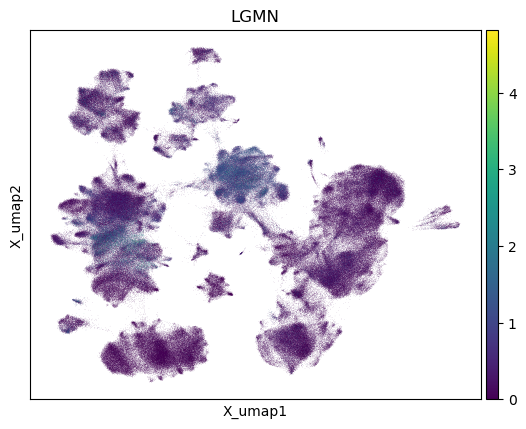

In [57]:
sc.pl.embedding(adata, basis="X_umap", color="LGMN", layer="X")

In [58]:
adata.write_h5ad(out_file)